In [61]:
import pandas as pd

train = pd.read_csv('../train_data_v2.csv')
test = pd.read_csv('../test_data_v2.csv')
train.head()

,Unnamed: 0,student_id,skill_id,skill_mastery,ability_profile,problem_difficulty,problem_alpha,correctness
0,0,2,83,0.563882,0,1.281928,0.825713,1
1,1,2,82,0.742560,0,0.288214,2.000000,1
2,2,2,82,0.844854,0,1.941272,0.250000,1
3,3,2,37,0.606742,0,-1.866635,2.000000,0
4,4,2,37,0.608723,0,2.000000,0.836878,1


In [62]:
test[test['student_id'] == 1]

,Unnamed: 0,student_id,skill_id,skill_mastery,ability_profile,problem_difficulty,problem_alpha,correctness
525,525,1,38,0.788669,0,1.013509,0.250000,1
526,526,1,81,0.552147,0,-1.019270,1.024539,0
527,527,1,81,0.103216,0,-0.968805,0.250000,1
528,528,1,81,0.268809,0,0.344512,0.990410,1
529,529,1,81,0.481265,0,1.544376,2.000000,1
...,...,...,...,...,...,...,...,...
707,707,1,50,0.103945,4,-0.643387,0.520158,0
708,708,1,50,0.101209,4,0.583973,0.250000,1
709,709,1,50,0.265845,4,-0.327092,0.816090,1
710,710,1,50,0.477948,4,0.129610,1.496349,0


In [63]:
from collections import defaultdict
D = defaultdict(int)
students = test['student_id'].unique().tolist()
for s in students:
  D[s] = len(test[test['student_id'] == s])
print(max(D.values()))

739


In [64]:
print(len(students))

404


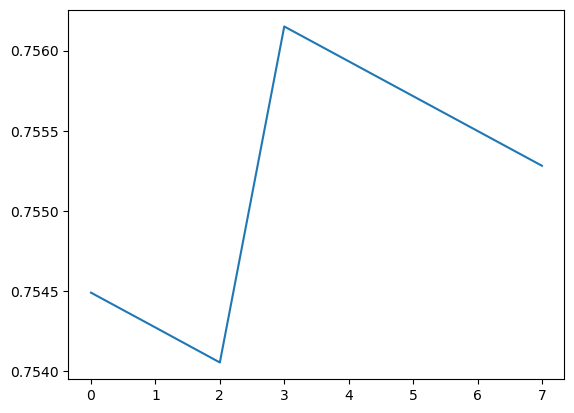

In [65]:
import matplotlib.pyplot as plt
y = train[(train['student_id'] == 2) & (train['skill_id'] == 40)]['skill_mastery'].tolist()
x = list(range(len(y)))
plt.plot(x, y)

In [66]:
correct = test['correctness'].tolist()
save_truth = pd.read_csv('../../KnowledgeTracing/dataset/save_truth.csv', header=None, names=['correctness'])
save_pred = pd.read_csv('../../KnowledgeTracing/dataset/save_pred.csv', header=None, names=['pred'])
truth = save_truth['correctness'].tolist()
pred = save_pred['pred'].tolist()

if correct == truth:
  print('good')
else:
  print('different')

good


In [67]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [68]:
test['dkt'] = pred
test.to_csv('check.csv')

In [69]:
test[test['dkt'] < 0.5]['correctness'].value_counts()

0    7775
1    4360
Name: correctness, dtype: int64

In [70]:
correct = train['correctness'].tolist()
save_truth = pd.read_csv('../../KnowledgeTracing/dataset/train_save_truth.csv', header=None, names=['correctness'])
save_pred = pd.read_csv('../../KnowledgeTracing/dataset/train_save_pred.csv', header=None, names=['pred'])
truth = save_truth['correctness'].tolist()
pred = save_pred['pred'].tolist()

if correct == truth:
  print('good')
else:
  print('different')

good


In [71]:
train['dkt'] = pred
train.to_csv('../v4/train_data.csv')
test.to_csv('../v4/test_data.csv')